# 目標説明:
## 我的車值多少？二手車價格預測模型分析 使用Kaggle Used Car的dataset擬合出預測方程式， 
## 可快速的進行二手車估價， 並使用不同的模型比對估價的準確度，
## 以此作爲此次專題報告的内容.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 資料集說明:總共1000筆數據
## 使用 Kaggle 上的 Second Hand Used Cars Dataset – Regression
## 包含車齡（years）、行駛里程（km）、車況、馬力、扭力與油耗等欄位.
## 目標欄位為 current price
## https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression

In [28]:
# 讀取資料
df = pd.read_csv("data/usedcar_data.csv")  #已存在data folder下
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [59]:
# 特徵選擇與清理
df.drop(columns=['v.id', 'on road old', 'on road now'], inplace=True) #先移除不要的欄位
df = df[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']]
df.dropna(inplace=True)  # 好像沒有n/a的欄位但還是加上這行

In [60]:
# 特徵與標籤分開
X = df.drop(columns=['current price'])
y = df['current price']

In [61]:
# Pearson相關係數
correlations = df.corr(numeric_only=True)['current price'].drop('current price')
print("與Current Price的皮爾森相關係數：")
print(correlations.sort_values(ascending=False))

與Current Price的皮爾森相關係數：
condition    0.110108
rating       0.035038
hp           0.030238
torque      -0.002290
years       -0.011854
top speed   -0.027993
economy     -0.034711
km          -0.935924
Name: current price, dtype: float64


In [62]:
# 資料分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [63]:
# 指定訓練模型
lr = LinearRegression()
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
lasso = Lasso()
rf = RandomForestRegressor(random_state=42)

In [64]:
# 訓練 - Linear Regression
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
# 訓練 - Polynomial Regression d2
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [66]:
# 訓練 - Lasso Regression
lasso.fit(X_train, y_train)

Lasso()

In [67]:
# 訓練 - Random Forest Regression
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Predict 1
lr_predict = lr.predict(X_test)

In [69]:
# Predict 2
poly_predict = poly_model.predict(X_test)

In [70]:
# Predict 3
lasso_predict = lasso.predict(X_test)

In [71]:
# Predict 4
rf_predict = rf.predict(X_test)

In [72]:
# 建立評估的函數def
def evaluate_model(name, y_test, y_predict):
    mae = mean_absolute_error(y_test, y_predict)
    # FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'
    rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    r2 = r2_score(y_test, y_predict)
    return (name, mae, rmse, r2)

In [73]:
ev_lr = evaluate_model("Linear Regression", y_test, lr_predict)
ev_poly = evaluate_model("Polynomial Regression", y_test, poly_predict)
ev_lasso = evaluate_model("Lasso Regression", y_test, lasso_predict)
ev_rf = evaluate_model("Random Forest", y_test, rf_predict)

In [74]:
# 顯示結果
print(ev_lr)
print(ev_poly)
print(ev_lasso)
print(ev_rf)

('Linear Regression', 34872.93998349457, 41977.03973322868, 0.895183230908272)
('Polynomial Regression', 34421.66972469396, 41489.90467117099, 0.8976018699354)
('Lasso Regression', 34872.96229417997, 41977.061009454, 0.8951831246546735)
('Random Forest', 36432.508625, 43564.787989647004, 0.8871040502077758)


In [75]:
models_eval = [ev_lr, ev_poly, ev_lasso, ev_rf]

for model in models_eval:
    name, mae, rmse, r2 = model
    print(f"{name:<20} | MAE: {mae:,.2f} | RMSE: {rmse:,.2f} | R²: {r2:.4f}")

Linear Regression    | MAE: 34,872.94 | RMSE: 41,977.04 | R²: 0.8952
Polynomial Regression | MAE: 34,421.67 | RMSE: 41,489.90 | R²: 0.8976
Lasso Regression     | MAE: 34,872.96 | RMSE: 41,977.06 | R²: 0.8952
Random Forest        | MAE: 36,432.51 | RMSE: 43,564.79 | R²: 0.8871


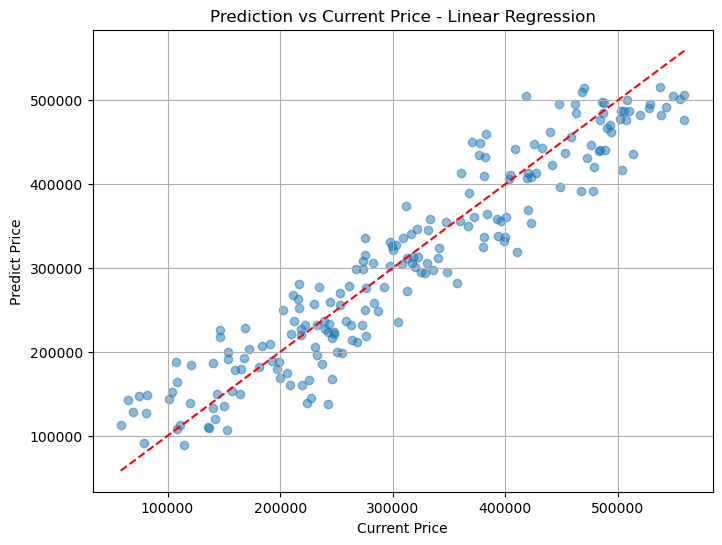

In [76]:
# 使用Linear Regression的預測結果進行圖示
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Current Price")
plt.ylabel("Predict Price")
plt.title("Prediction vs Current Price - Linear Regression")
plt.grid(True)
plt.show()

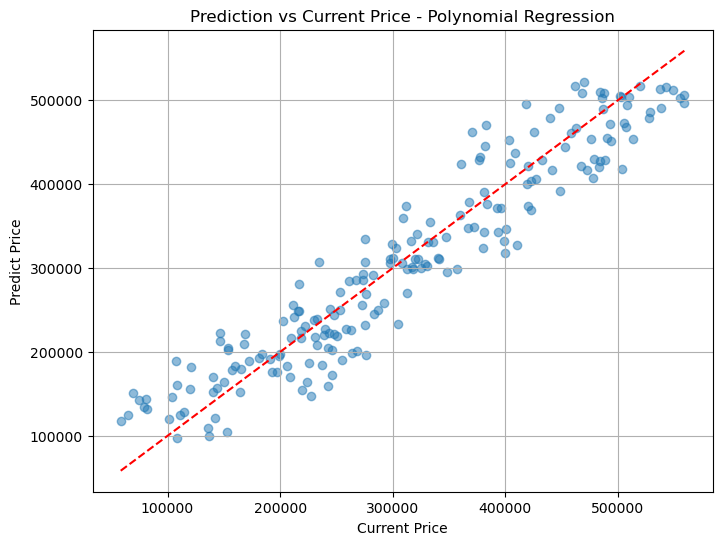

In [77]:
# 使用Polynomial Regression的預測結果進行圖示
plt.figure(figsize=(8, 6))
plt.scatter(y_test, poly_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Current Price")
plt.ylabel("Predict Price")
plt.title("Prediction vs Current Price - Polynomial Regression")
plt.grid(True)
plt.show()

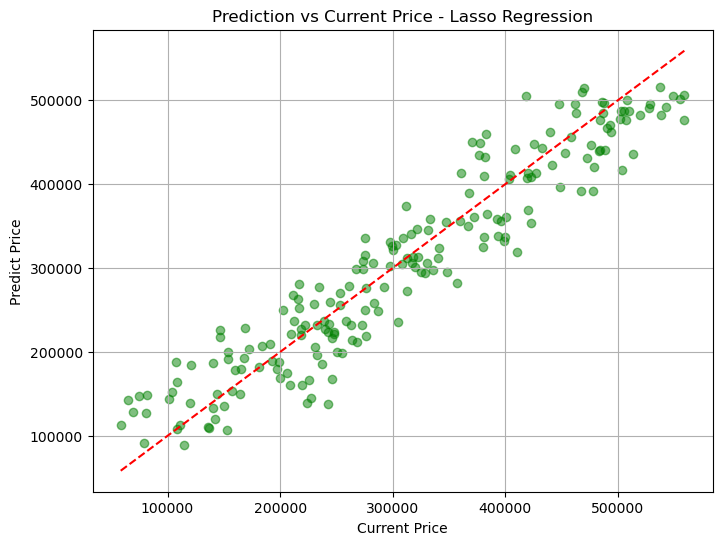

In [78]:
# 使用Lasso Regression的預測結果進行圖示
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_predict, alpha=0.5, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Current Price")
plt.ylabel("Predict Price")
plt.title("Prediction vs Current Price - Lasso Regression")
plt.grid(True)
plt.show()

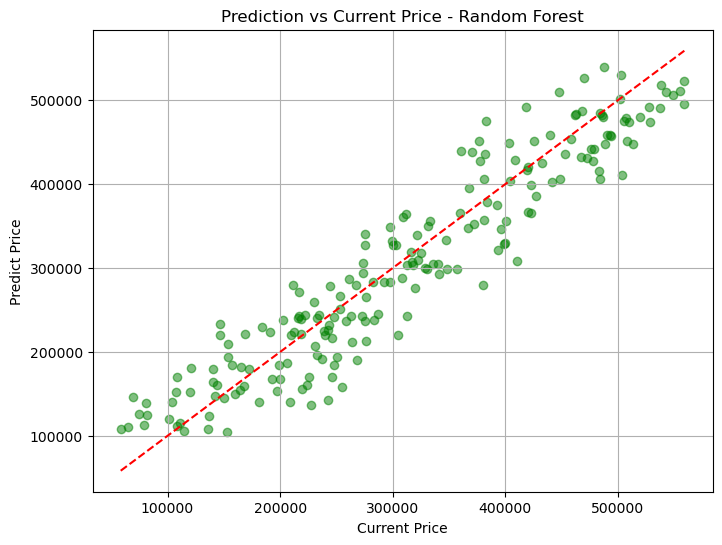

In [79]:
# 使用Random Forest的預測結果進行圖示
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predict, alpha=0.5, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Current Price")
plt.ylabel("Predict Price")
plt.title("Prediction vs Current Price - Random Forest")
plt.grid(True)
plt.show()

In [80]:
# 顯示係數-只支援Linear與Lasso
features = ['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque']

def print_coefficients(name, model, features):
    print(f"{name} Intercept: {model.intercept_:.2f}")
    for coef, feat in zip(model.coef_, features):
        print(f"  {feat:<10}: {coef:+.2f}")
    print()

print_coefficients("Linear Regression", lr, features)
#print_coefficients("Polynomial Regression", poly_model, features)   # 無intercept_
print_coefficients("Lasso Regression", lasso, features)

Linear Regression Intercept: 702984.36
  years     : -1150.96
  km        : -4.02
  rating    : -320.41
  condition : +4501.08
  economy   : -340.38
  top speed : -108.46
  hp        : +11.37
  torque    : +93.43

Lasso Regression Intercept: 702979.83
  years     : -1150.64
  km        : -4.02
  rating    : -319.92
  condition : +4500.92
  economy   : -340.17
  top speed : -108.45
  hp        : +11.37
  torque    : +93.43



In [81]:
#輸出 Polynomial Regression 的係數與多項式特徵
poly_linear = poly_model.named_steps["linearregression"]
poly_feats = poly_model.named_steps["polynomialfeatures"].get_feature_names_out()

print(f"=== Polynomial Regression (degree=2) ===")
print(f"Intercept: {poly_linear.intercept_:.2f}")
for coef, feat in zip(poly_linear.coef_, poly_feats):
    print(f"  {feat:<25}: {coef:+.2f}")

=== Polynomial Regression (degree=2) ===
Intercept: 907421.65
  1                        : -0.00
  years                    : +9477.96
  km                       : -3.26
  rating                   : -10531.07
  condition                : -14610.62
  economy                  : +5774.34
  top speed                : -2431.96
  hp                       : -2288.56
  torque                   : +889.60
  years^2                  : -833.25
  years km                 : -0.04
  years rating             : -177.83
  years condition          : -326.74
  years economy            : +554.93
  years top speed          : -18.09
  years hp                 : -10.73
  years torque             : +5.36
  km^2                     : +0.00
  km rating                : +0.06
  km condition             : -0.04
  km economy               : -0.01
  km top speed             : -0.00
  km hp                    : -0.00
  km torque                : -0.00
  rating^2                 : +801.53
  rating condition         : 